# My First Linear Regression in Python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
data = pd.read_csv('./data/student_scores.csv')
data.shape

(30, 2)

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [15]:
X = data.iloc[:,0].values
y = data.iloc[:,1].values

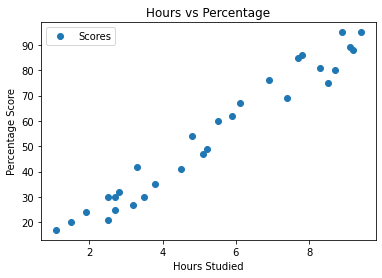

In [16]:
plt.plot(X, y, 'o',label="Scores")
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.legend(loc="best")
plt.show()

In [17]:
X=X.reshape(-1,1)
print(X.shape)
y=y.reshape(-1,1)
print(y.shape)

(30, 1)
(30, 1)


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
y_train.shape,y_test.shape

((24, 1), (6, 1))

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
print(f"Intercept={lr.intercept_}")
print(f"Cofficient={lr.coef_}")

Intercept=[3.97104692]
Cofficient=[[9.30342917]]


In [56]:
# predicted percent_score=9.30*hours+3.97

In [22]:
y_pred = lr.predict(X_test)
np.round(y_pred,2)

array([[33.74],
       [52.35],
       [34.67],
       [75.61],
       [91.42],
       [76.54]])

In [26]:
#df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
#df

In [23]:
print(f"Training Score={np.round(lr.score(X_train,y_train),2)}")
print(f"Testing Score={np.round(lr.score(X_test,y_test),2)}")

Training Score=0.96
Testing Score=0.92


In [24]:
lr.score(X_test,y_test)

0.9240892265749358

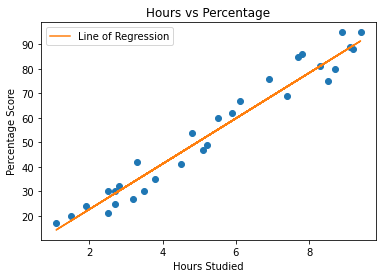

In [25]:
plt.plot(X, y,'o')
plt.plot(X,lr.predict(X),label="Line of Regression")
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.legend(loc="best")
plt.show()

# Regression Metrics

In [25]:
from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Mean of target values=",np.mean(y))

Root Mean Squared Error: 7.081787743418027
Mean of target values= 54.4


In [61]:
np.mean(y)

54.4

In [68]:
model.score(X_test,y_test)

0.9240892265749358

# Using Pickle

In [28]:
import pickle

In [29]:
# saving model
fname= "pickle_lr_model.pkl"
with open(fname, 'wb') as file:
    pickle.dump(lr, file)

In [30]:
# Loading model from file
with open(fname, 'rb') as file:
    pickle_lr_model = pickle.load(file)

In [31]:
# using model
pickle_lr_model.score(X_test,y_test)

0.9240892265749358

# Using Joblib

In [32]:
import joblib

In [33]:
joblib.dump(lr, 'reg_1.sav')

['reg_1.sav']

In [34]:
joblib_model= joblib.load('reg_1.sav')

In [35]:
# using model
joblib_model.score(X_test,y_test)

0.9240892265749358